In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [8]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [9]:
from tensorflow.keras.layers import *

(X_train, y_train) ,(X_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 27s 0us/step


In [57]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [60]:
# 총 0부터 9까지 10개의 정답이 있다.
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
          'horse', 'ship', 'truck']

# 이미지 사이즈
IMG_SIZE = (32, 32)
# 이미지 형태
IMG_SHAPE = (32, 32, 3)
# 배치 사이즈
BATCH_SIZE = 32

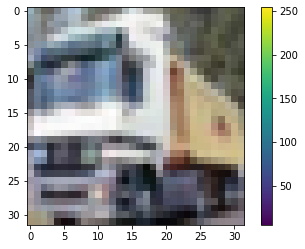

In [16]:
# 두 번째 영상(트럭을)을 화면에 표시한다.
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

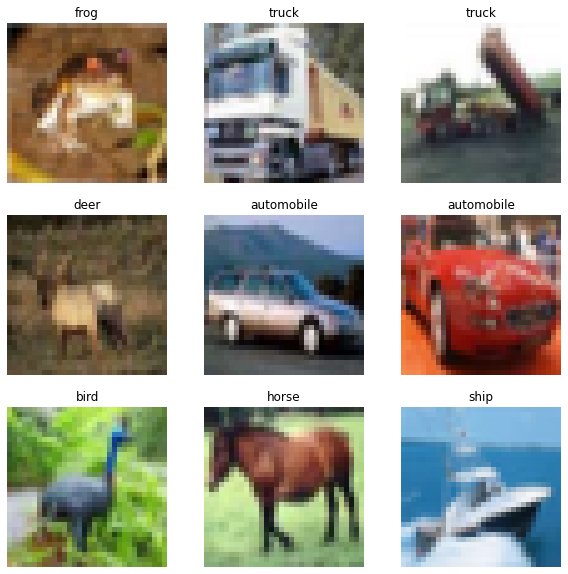

In [31]:
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i][0]])
    plt.axis('off')
plt.show()

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [34]:
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3)))
model.add(Flatten(input_shape= (32, 32, 3)))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', \
              metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 16s 5ms/step - loss: 1.5044 - accuracy: 0.4553 - val_loss: 1.2626 - val_accuracy: 0.5491
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.1698 - accuracy: 0.5858 - val_loss: 1.1396 - val_accuracy: 0.5921
Epoch 3/10
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0190 - accuracy: 0.6395 - val_loss: 1.0761 - val_accuracy: 0.6189
Epoch 4/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9065 - accuracy: 0.6827 - val_loss: 0.9931 - val_accuracy: 0.6571
Epoch 5/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8160 - accuracy: 0.7123 - val_loss: 1.0498 - val_accuracy: 0.6454
Epoch 6/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7345 - accuracy: 0.7416 - val_loss: 1.0251 - val_accuracy: 0.6507
Epoch 7/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.6594 - accuracy: 0.7700 - val_loss: 1.2373 - val_accuracy

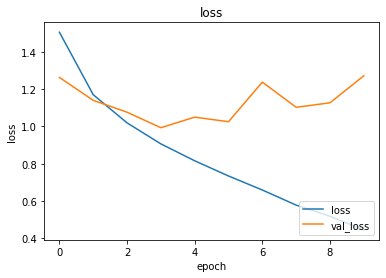

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

정답= cat
예측 레이블= cat


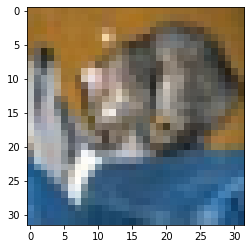

In [39]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", labels[y_test[0][0]])
print("예측 레이블=", labels[np.argmax(y_pred[0])])

In [40]:
# 데이터증강을 위한 라이브러리
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [44]:
image = load_img('dog.jpeg')
array = img_to_array(image)
sample = expand_dims(array, axis=0)

# 차원이 하나 늘어난 것을 볼 수 있다.
print(sample.shape)

(1, 420, 630, 3)


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataget = ImageDataGenerator(rescale=1./255, rotation_range=90,
                             brightness_range=[0.8, 1.0],
                             width_shift_range=0.2,
                             zoom_range=[0.8, 1.2],
                             height_shift_range=0.2)

obj = dataget.flow(sample, batch_size=1)

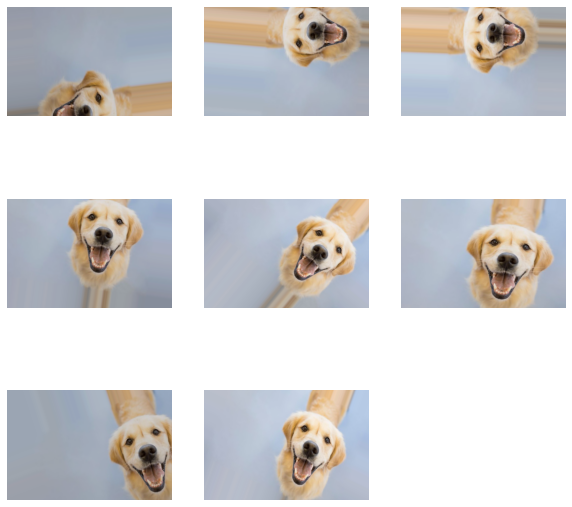

In [54]:
fig = plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(3, 3, i+1)
    image = obj.next()
    plt.imshow(image[0])
    plt.axis('off')

In [69]:
# 트레인과 테스트 이미지 증강을 만들어주자
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
train_generator = train_datagen.flow(
    X_train,
    batch_size=BATCH_SIZE)

test_generator = test_datagen.flow(
    X_test,
    batch_size=BATCH_SIZE)

In [74]:
# 원하는 콜백함수 생성
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=7)

In [76]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[earlystop],
                    validation_split=0.3)

Epoch 1/100
1094/1094 [==============================] - 6s 5ms/step - loss: 0.3829 - accuracy: 0.8645 - val_loss: 1.3895 - val_accuracy: 0.6429
Epoch 2/100
1094/1094 [==============================] - 6s 5ms/step - loss: 0.3299 - accuracy: 0.8837 - val_loss: 1.4317 - val_accuracy: 0.6387
Epoch 3/100
1094/1094 [==============================] - 6s 5ms/step - loss: 0.2824 - accuracy: 0.8996 - val_loss: 1.5560 - val_accuracy: 0.6282
Epoch 4/100
1094/1094 [==============================] - 7s 7ms/step - loss: 0.2418 - accuracy: 0.9152 - val_loss: 1.7858 - val_accuracy: 0.6225
Epoch 5/100
1094/1094 [==============================] - 6s 5ms/step - loss: 0.2061 - accuracy: 0.9280 - val_loss: 1.8258 - val_accuracy: 0.6301
Epoch 6/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.1725 - accuracy: 0.9411 - val_loss: 1.9628 - val_accuracy: 0.6295
Epoch 7/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.1595 - accuracy: 0.9464 - val_loss: 2.1674 - val_ac

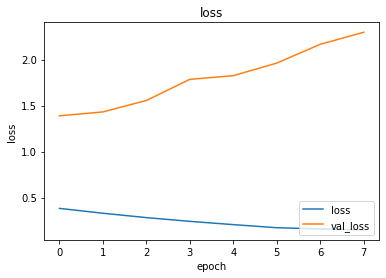

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()